# Install Autogluon

In [ ]:
!pip install autogluon.timeseries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Data Processing

## Load Datasets

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/VM/combined_data.csv'  # Respective path
data = pd.read_csv(path)

data["timestamp"] = pd.to_datetime(data["Timestamp"])

data = data.sort_values("timestamp")

split_index = int(len(data) * 0.1)
data= data.iloc[:split_index]

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 0 to 2217
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  403 non-null    object        
 1   Value      403 non-null    float64       
 2   item_id    403 non-null    object        
 3   timestamp  403 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.7+ KB
None
                Timestamp      Value                item_id  \
0     2025-02-01 00:00:00   7.181863     docker-desktop_cpu   
2016  2025-02-01 00:00:00  10.016959  docker-desktop_memory   
1     2025-02-01 00:05:00   6.909569     docker-desktop_cpu   
2017  2025-02-01 00:05:00  16.692366  docker-desktop_memory   
2     2025-02-01 00:10:00   6.609085     docker-desktop_cpu   

               timestamp  
0    2025-02-01 00:00:00  
2016 2025-02-01 00:00:00  
1    2025-02-01 00:05:00  
2017 2025-02-01 00:05:00  
2    2025-02-01 00:10:00  


## Split Datasets


In [ ]:
data = data.sort_values("timestamp")

split_index = int(len(data) * 0.8)

train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

print("TestDataset：")
print(train_data)
print("TrainDataset：")
print(test_data)

TestDataset：
                Timestamp      Value                item_id  \
0     2025-02-01 00:00:00   7.181863     docker-desktop_cpu   
2016  2025-02-01 00:00:00  10.016959  docker-desktop_memory   
1     2025-02-01 00:05:00   6.909569     docker-desktop_cpu   
2017  2025-02-01 00:05:00  16.692366  docker-desktop_memory   
2     2025-02-01 00:10:00   6.609085     docker-desktop_cpu   
...                   ...        ...                    ...   
158   2025-02-01 13:10:00   8.583105     docker-desktop_cpu   
2175  2025-02-01 13:15:00  20.003365  docker-desktop_memory   
159   2025-02-01 13:15:00   8.864109     docker-desktop_cpu   
2176  2025-02-01 13:20:00  21.993282  docker-desktop_memory   
160   2025-02-01 13:20:00   8.582557     docker-desktop_cpu   

               timestamp  
0    2025-02-01 00:00:00  
2016 2025-02-01 00:00:00  
1    2025-02-01 00:05:00  
2017 2025-02-01 00:05:00  
2    2025-02-01 00:10:00  
...                  ...  
158  2025-02-01 13:10:00  
2175 2025-02-0

Inferred time series frequency: '5min'


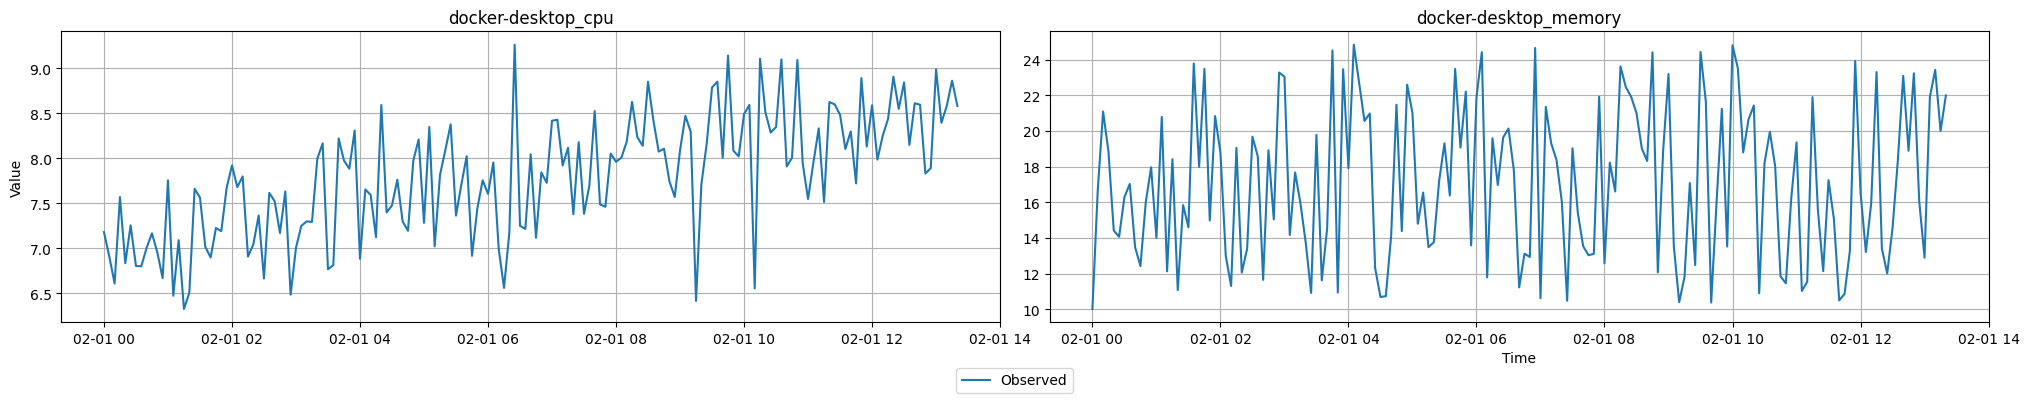

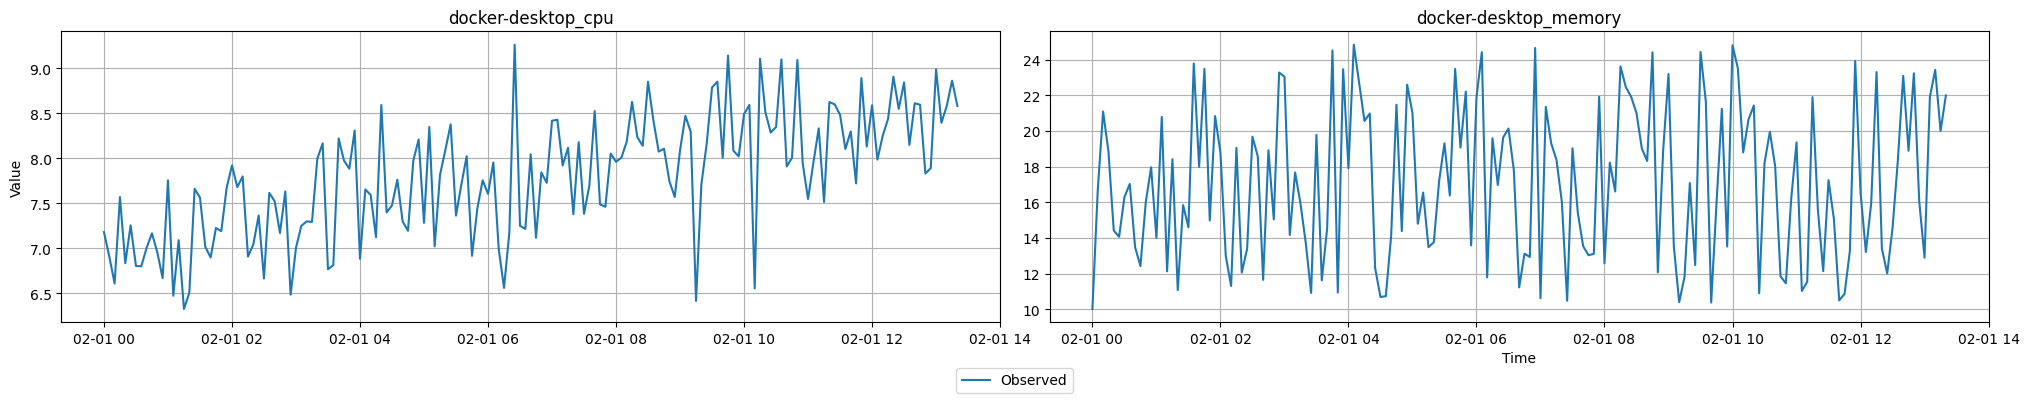

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor(
    target="Value",
    prediction_length=1,
    quantile_levels=[0.05, 0.95]  # 95 % percent confident level
)

predictor.plot(train_data)

# Model Training


### WQL Loss + 95% confidence level

At the very beginning, we trained using the default loss function and a common 95% confidence interval.

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor(
    target="Value",
    prediction_length=1,
    quantile_levels=[0.025, 0.975]  # 90 % percent confident level
)

# Train Model
predictor.fit(
    train_data,
    time_limit=7200,  # Maximum 2 hours training time
    presets='best_quality',
)


Beginning AutoGluon training... Time limit = 7200s
AutoGluon will save models to '/content/AutogluonModels/ag-20250220_125806'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          1
Memory Avail:       9.85 GB / 12.67 GB (77.7%)
Disk Space Avail:   199.86 GB / 235.68 GB (84.8%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 1,
 'quantile_levels': [0.025, 0.975],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Value',
 'time_limit': 7200,
 'verbosity': 2}

Inferred time series frequency: '5min'
Provided train_data has 322 rows, 2 time series. M

####  Compare Models


In [ ]:
# Use Leader Board to compare models
leaderboard = predictor.leaderboard(data=test_data, silent=True)
leaderboard


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,AutoETS,-0.025202,-0.016084,0.012063,0.018665,0.081381,6
1,DynamicOptimizedTheta,-0.026421,-0.015602,0.013667,0.061229,0.087889,5
2,DeepAR,-0.026785,-0.015605,0.026422,0.021457,122.866964,10
3,PatchTST,-0.028800,-0.007163,0.026183,0.013268,80.437370,11
4,SeasonalNaive,-0.033759,-0.021940,0.007954,0.009844,0.033583,1
5,TemporalFusionTransformer,-0.047574,-0.014657,0.075579,0.021023,133.906649,9
6,NPTS,-0.078416,-0.011958,0.010548,0.016543,0.039177,4
7,ChronosZeroShot[bolt_base],-0.097219,-0.010836,1.662055,1.440974,1.468138,7
8,DirectTabular,-0.160565,-0.016635,0.219777,0.334114,11.182736,3
9,TiDE,-0.263464,-0.010433,0.044572,0.023833,184.802265,12


#### Evaluate Best Model Performance

In [ ]:
def sliding_window_predict_with_actual_update(predictor, model, train_data, test_data, prediction_length, max_history_length):
    """
    Predict the test set using a global sliding window and update the window with actual values, limiting the history length.
    :param predictor: Trained TimeSeriesPredictor from AutoGluon
    :param model: Selected Model
    :param train_data: Training dataset (includes all item_ids)
    :param test_data: Test dataset (includes all item_ids)
    :param prediction_length: Prediction length of the model
    :param max_history_length: Maximum history length for the sliding window
    :return: DataFrame containing the complete prediction results
    """
    predictions = []
    current_window = train_data.copy()  # Initalize Current window with training window

    unique_item_ids = train_data["item_id"].unique()
    num_item_ids = len(unique_item_ids)

    # Increment = prediction_length * num of item_ids
    increment = num_item_ids * prediction_length

    # walk through the whole datasets
    for start_idx in range(0, len(test_data) , increment):
        # limit max history
        if len(current_window) > max_history_length * num_item_ids:
            current_window = (
                current_window.groupby("item_id")
                .tail(max_history_length)
            )

        # forecast
        forecast = predictor.predict(current_window, model=model)

        # save result
        predictions.append(forecast)

        # roll windows
        increment_window = test_data.iloc[start_idx : start_idx + increment]
        current_window = pd.concat([current_window, increment_window])

    # concact all predictions
    full_predictions = pd.concat(predictions)
    return full_predictions


In [ ]:
# hyper parameters
prediction_length = 1
max_history_length = 100

leaderboard = predictor.leaderboard(silent=True)
best_model = leaderboard.iloc[0]['model']

full_predictions = sliding_window_predict_with_actual_update(
    predictor, best_model, train_data, test_data, prediction_length, max_history_length
)


	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Qua

In [ ]:
print(len(full_predictions))
print(len(test_data))

82
81


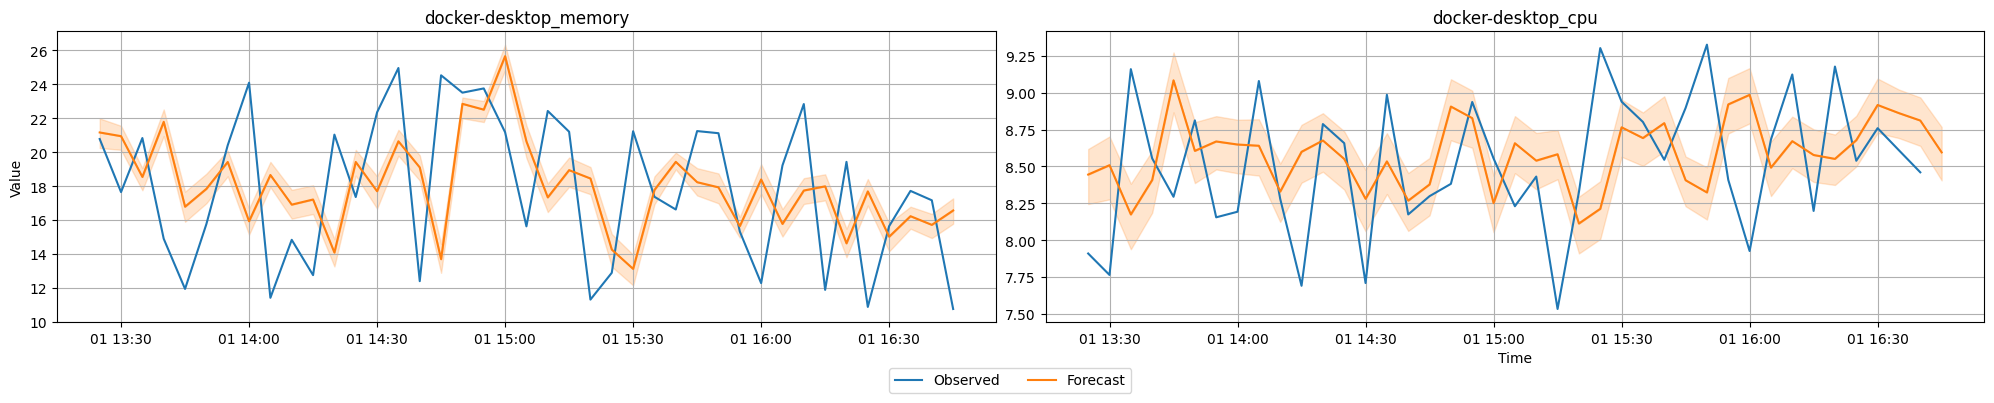

In [ ]:
predictor.plot(
    data=test_data,
    predictions=full_predictions,
    max_history_length=max_history_length,
);

In [ ]:
def calculate_metrics_with_test_data_and_item(full_predictions, test_data, lower_col="lower", upper_col="upper"):
    """
    Calculate overall PICP, PINAW, and MSE metrics, as well as per-item metrics, weighted metrics, and variance.

    :param full_predictions: DataFrame containing the predicted mean, confidence interval lower bound (lower_col),
                             and confidence interval upper bound (upper_col).
    :param test_data: DataFrame containing the actual values ("Value"), along with corresponding timestamp and item_id.
    :param lower_col: str, the name of the column for the confidence interval lower bound, default is "lower".
    :param upper_col: str, the name of the column for the confidence interval upper bound, default is "upper".
    :return: A dictionary containing overall, per-item, weighted metrics, and variance of PICP, PINAW, and MSE.
    """
    # Ensure the test_data contains "item_id" and "timestamp"
    if "item_id" not in test_data.columns or "timestamp" not in test_data.columns:
        raise KeyError("test_data must contain 'item_id' and 'timestamp' columns.")

    # Align full_predictions and test_data by item_id and timestamp
    test_data_indexed = test_data.set_index(["item_id", "timestamp"])
    full_predictions_indexed = full_predictions.copy()

    # Ensure full_predictions contains lower_col and upper_col
    if lower_col not in full_predictions.columns or upper_col not in full_predictions.columns:
        raise KeyError(f"full_predictions must contain '{lower_col}' and '{upper_col}' columns.")

    # Merge predictions and actual values
    combined = full_predictions_indexed.merge(
        test_data_indexed, left_index=True, right_index=True, how="inner"
    )

    # Check if merged data is not empty
    if combined.empty:
        raise ValueError("Full predictions and test data do not align. Please check the data.")

    # Calculate overall metrics
    overall_picp = ((combined["Value"] >= combined[lower_col]) & (combined["Value"] <= combined[upper_col])).mean()
    overall_interval_width = combined[upper_col] - combined[lower_col]
    overall_range_actual = combined["Value"].max() - combined["Value"].min()
    overall_pinaw = (overall_interval_width.mean() / overall_range_actual) if overall_range_actual != 0 else float('inf')
    overall_mse = ((combined["Value"] - combined["mean"]) ** 2).mean()

    # Calculate metrics per item_id
    results_by_item = []
    for item_id, group in combined.groupby("item_id"):
        # Calculate PICP
        picp = ((group["Value"] >= group[lower_col]) & (group["Value"] <= group[upper_col])).mean()

        # Calculate PINAW
        interval_width = group[upper_col] - group[lower_col]
        range_actual = group["Value"].max() - group["Value"].min()
        pinaw = (interval_width.mean() / range_actual) if range_actual != 0 else float('inf')

        # Calculate MSE
        mse = ((group["Value"] - group["mean"]) ** 2).mean()

        results_by_item.append({
            "item_id": item_id,
            "PICP": picp,
            "PINAW": pinaw,
            "MSE": mse
        })

    # Convert per-item results to DataFrame
    results_by_item_df = pd.DataFrame(results_by_item)

    # Calculate weighted metrics
    weights = results_by_item_df["item_id"].map(combined.groupby("item_id").size())
    total_samples = weights.sum()
    weighted_picp = sum(results_by_item_df["PICP"] * (weights / total_samples))
    weighted_pinaw = sum(results_by_item_df["PINAW"] * (weights / total_samples))
    weighted_mse = sum(results_by_item_df["MSE"] * (weights / total_samples))

    # Calculate variance of metrics
    picp_variance = results_by_item_df["PICP"].var()
    pinaw_variance = results_by_item_df["PINAW"].var()
    mse_variance = results_by_item_df["MSE"].var()

    return {
        "overall": {
            "PICP": overall_picp,
            "PINAW": overall_pinaw,
            "MSE": overall_mse
        },
        "weighted": {
            "PICP": weighted_picp,
            "PINAW": weighted_pinaw,
            "MSE": weighted_mse
        },
        "variance": {
            "PICP": picp_variance,
            "PINAW": pinaw_variance,
            "MSE": mse_variance
        },
        "by_item": results_by_item_df
    }

# Example usage:
metrics = calculate_metrics_with_test_data_and_item(full_predictions, test_data, lower_col="0.025", upper_col="0.975")

# Print overall metrics
print("Overall Metrics:")
print(metrics["overall"])

# Print weighted metrics
print("Weighted Metrics:")
print(metrics["weighted"])

# Print variance metrics
print("Variance Metrics:")
print(metrics["variance"])

# Print per-item metrics
print("Metrics by Item:")
print(metrics["by_item"])


Overall Metrics:
{'PICP': 0.19753086419753085, 'PINAW': 0.05649185291078663, 'MSE': 11.677162538478024}
Weighted Metrics:
{'PICP': 0.19753086419753085, 'PINAW': 0.16076023793951214, 'MSE': 11.677162538478024}
Variance Metrics:
{'PICP': 0.02049077929803688, 'PINAW': 0.005100273276435674, 'MSE': 253.487588035876}
Metrics by Item:
                 item_id      PICP     PINAW        MSE
0     docker-desktop_cpu  0.300000  0.211883   0.280120
1  docker-desktop_memory  0.097561  0.110885  22.796229


#### Compare All supported models

In [ ]:
prediction_length = 1
max_history_length = 100

leaderboard = predictor.leaderboard(silent=True)
all_models = leaderboard['model'].tolist()

all_predictions = {}
metrics_per_model = []

for model in all_models:
    print(f"Testing model: {model}")
    predictions = sliding_window_predict_with_actual_update(
        predictor, model, train_data, test_data, prediction_length, max_history_length
    )
    all_predictions[model] = predictions

    metrics = calculate_metrics_with_test_data_and_item(
        predictions, test_data, lower_col="0.025", upper_col="0.975"
    )
    metrics_per_model.append({
        "model": model,
        "overall": metrics["overall"],
        "weighted": metrics["weighted"],
        "variance": metrics["variance"]
    })

import pandas as pd
metrics_df = pd.DataFrame([
    {
        "model": m["model"],
        "PICP_overall": m["overall"]["PICP"],
        "PINAW_overall": m["overall"]["PINAW"],
        "MSE_overall": m["overall"]["MSE"],
        "PICP_weighted": m["weighted"]["PICP"],
        "PINAW_weighted": m["weighted"]["PINAW"],
        "MSE_weighted": m["weighted"]["MSE"],
        "PICP_variance": m["variance"]["PICP"],
        "PINAW_variance": m["variance"]["PINAW"],
        "MSE_variance": m["variance"]["MSE"]
    }
    for m in metrics_per_model
])


Testing model: WeightedEnsemble
Testing model: PatchTST
Testing model: TiDE
Testing model: ChronosZeroShot[bolt_base]


	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Quantiles to be predicted ([0.025, 0.5, 0.975]) are not within the range of quantiles that Chronos-Bolt was trained on ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]). Quantile predictions will be set to the minimum/maximum levels at which Chronos-Bolt was trained on. This may significantly affect the quality of the predictions.
	Qua

Testing model: NPTS
Testing model: TemporalFusionTransformer
Testing model: DynamicOptimizedTheta
Testing model: DeepAR
Testing model: AutoETS
Testing model: DirectTabular
Testing model: SeasonalNaive
Testing model: ChronosFineTuned[bolt_small]
Testing model: RecursiveTabular


#### Visualize The results

In [ ]:
metrics_df

,model,PICP_overall,PINAW_overall,MSE_overall,PICP_weighted,PINAW_weighted,MSE_weighted,PICP_variance,PINAW_variance,MSE_variance
0,WeightedEnsemble,0.197531,0.056492,11.677163,0.197531,0.160760,11.677163,0.020491,0.005100,253.487588
1,PatchTST,0.691358,0.300881,15.212672,0.691358,0.819927,15.212672,0.084952,0.098320,433.506468
2,TiDE,0.740741,0.386591,14.580862,0.740741,1.187594,14.580862,0.131172,0.422122,404.184585
3,ChronosZeroShot[bolt_base],0.753086,0.382423,10.386837,0.753086,0.772238,10.386837,0.000019,0.009651,201.672940
4,NPTS,0.790123,0.377883,11.222657,0.790123,0.817996,11.222657,0.003142,0.000016,235.227944
5,TemporalFusionTransformer,0.888889,0.439179,13.165013,0.888889,0.902557,13.165013,0.002951,0.007040,318.543260
6,DynamicOptimizedTheta,0.987654,0.572072,10.029713,0.987654,1.369841,10.029713,0.000297,0.061559,187.917291
7,DeepAR,0.913580,0.543885,14.773891,0.913580,1.075010,14.773891,0.007362,0.033327,414.278705
8,AutoETS,0.987654,0.571940,9.890683,0.987654,1.192172,9.890683,0.000313,0.006144,182.830555
9,DirectTabular,0.753086,0.318744,10.895923,0.753086,0.809093,10.895923,0.042121,0.049568,220.588358


Thus In this case, AutoETS is the best model meets the expected CI with 9.89 MSE comparably low.

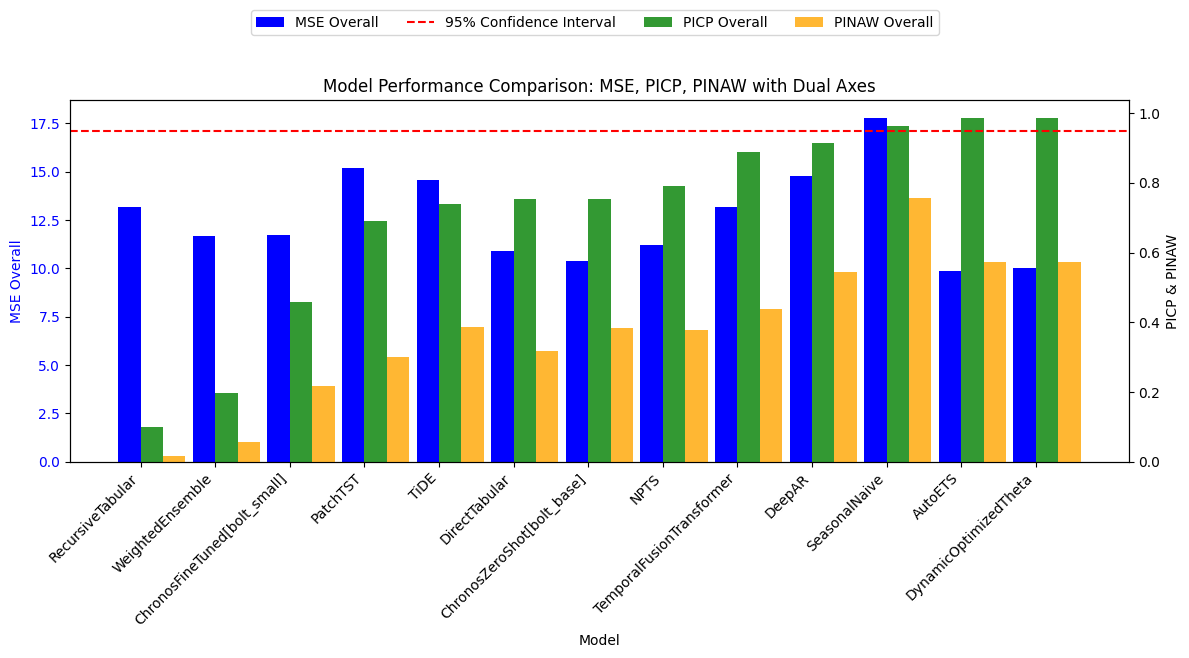

In [ ]:
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 6))

# Define the width of each bar and x positions
bar_width = 0.3
x = np.arange(len(metrics_df["model"]))  # X positions for the groups

# Plot MSE on the primary y-axis
ax1.bar(x - bar_width / 2, metrics_df["MSE_overall"], bar_width, color="blue", label="MSE Overall")
ax1.set_ylabel("MSE Overall", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("Model")
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_df["model"], rotation=45, ha="right")

# Create a secondary y-axis for PICP and PINAW
ax2 = ax1.twinx()
ax2.bar(x + bar_width / 2, metrics_df["PICP_overall"], bar_width, color="green", label="PICP Overall", alpha=0.8)
ax2.bar(x + 1.5 * bar_width, metrics_df["PINAW_overall"], bar_width, color="orange", label="PINAW Overall", alpha=0.8)
ax2.axhline(y=0.95, color="red", linestyle="--", label="95% Confidence Interval")
ax2.set_ylabel("PICP & PINAW", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Add legends
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=4)

# Set title and layout
plt.title("Model Performance Comparison: MSE, PICP, PINAW with Dual Axes")
plt.tight_layout()
plt.show()

## Optimization

| Metric | Full Name                      | Formula                                                                 | Advantages                                | Disadvantages                             | Use Cases                                 |
|--------|--------------------------------|-------------------------------------------------------------------------|-------------------------------------------|-------------------------------------------|-------------------------------------------|
| MAPE   | Mean Absolute Percentage Error | $ MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{A_i - F_i}{A_i} \right| $ | Intuitive, error expressed as a percentage| Sensitive to near-zero actual values      | Scenarios requiring percentage error      |
| MSE    | Mean Squared Error             | $ MSE = \frac{1}{n} \sum_{i=1}^{n} (A_i - F_i)^2 $                   | Sensitive to large errors, penalizes outliers | Sensitive to outliers, units are squared | Regression models, emphasizing large errors |
| WQL    | Weighted Quantile Loss         | $ WQL = \frac{1}{n} \sum_{i=1}^{n} \max(q \cdot (A_i - F_i), (1 - q) \cdot (F_i - A_i)) $ | Supports asymmetric error handling       | Complex to compute, less interpretable    | Quantile prediction, financial risk, inventory management |


**Notes**:
- MAPE: Suitable for scenarios requiring percentage error, but sensitive to near-zero actual values.

- MSE: Suitable for scenarios where large errors need to be penalized, but sensitive to outliers.

- WQL: Suitable for quantile prediction and asymmetric error handling, but more complex to compute and interpret.


Since we can see in previous experiment, Best model by WQL score doesn't perform best, this makes us wonder using other Loss function may be better.

## MSELoss + 0.95 Confidence Level

Mean Squared Error (MSE): Calculation and Why It's Used

1. What is MSE?
Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the actual values. The smaller the MSE, the better the model's performance.

2. How is MSE Calculated?
The formula for MSE is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $ n $: Number of data points.
- $ y_i $: Actual value for the \( i \)-th data point.
- $ \hat{y}_i $: Predicted value for the \( i \)-th data point.

Steps to Calculate MSE:
1. Compute the difference between the actual and predicted values for each data point.
2. Square the differences to eliminate negative values and emphasize larger errors.
3. Sum all the squared differences.
4. Divide the sum by the number of data points to get the average.

Example:
Suppose we have the following actual and predicted values:
- Actual values: \([3, 5, 7]\)
- Predicted values: \([2.5, 4.8, 7.2]\)

Calculate MSE:
$$
\text{MSE} = \frac{(3-2.5)^2 + (5-4.8)^2 + (7-7.2)^2}{3} = \frac{0.25 + 0.04 + 0.04}{3} = 0.11
$$

---

3. Why Use MSE?
- Advantages:
  - **Emphasizes Large Errors**:
   - Squaring the errors gives more weight to larger deviations, making MSE sensitive to outliers. This is useful when large errors are particularly undesirable.

  - **Differentiable**:
   - The squared error function is smooth and differentiable, which is important for optimization algorithms like gradient descent used in training machine learning models.

  - **Easy to Interpret**:
   - MSE provides a single scalar value that summarizes the model's performance, making it easy to compare different models.

  - **Mathematically Convenient**:
   - The squared term simplifies mathematical operations, such as computing derivatives, which are essential for model training.

- Limitations:
  - **Sensitive to Outliers**:
   - Since MSE squares the errors, outliers can disproportionately influence the result.

- **Scale-Dependent**:
   - MSE is not normalized, so its value depends on the scale of the target variable. This makes it harder to compare across different datasets.

---

4. When to Use MSE?
- **Regression Problems**: MSE is ideal for evaluating regression models where the goal is to minimize prediction errors.
- **Outlier Sensitivity**: Use MSE when large errors need to be penalized heavily.
- **Model Optimization**: MSE is commonly used as the loss function in training regression models due to its differentiability.

---

5. Conclusion
MSE is a widely used metric for evaluating regression models due to its simplicity, emphasis on large errors, and mathematical convenience. However, it is important to be aware of its sensitivity to outliers and scale-dependency when interpreting results.

### Predictor Setup

As we see in previous experiment, the pre-trained model provided by AutoGLuon doesn't have expected percentiles, so we only need to foucs on AutoETS and DynamicOptimzied theta.

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor

# Specify the models to use in hyperparameters
hyperparameters = {
    "DeepAR": {},
    "AutoETS": {},
    "DynamicOptimizedTheta": {},  # Add DynamicOptimizedTheta model
}

predictor = TimeSeriesPredictor(
    target="Value",
    prediction_length=1,
    quantile_levels=[0.025, 0.975],
    eval_metric="MSE"
)

# Train Model with specific models
predictor.fit(
    train_data,
    time_limit=7200,
    presets='best_quality',
    hyperparameters=hyperparameters  # Pass in the models you want to use
)



Beginning AutoGluon training... Time limit = 7200s
AutoGluon will save models to '/content/AutogluonModels/ag-20250220_133915'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          1
Memory Avail:       9.81 GB / 12.67 GB (77.4%)
Disk Space Avail:   199.12 GB / 235.68 GB (84.5%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MSE,
 'hyperparameters': {'AutoETS': {}, 'DeepAR': {}, 'DynamicOptimizedTheta': {}},
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 1,
 'quantile_levels': [0.025, 0.975],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Value',
 'time_limit': 7200,
 'verbosity': 2}

Inferred time series frequency: '5min'
P

### Compare Models


In [ ]:
leaderboard = predictor.leaderboard(data=test_data, silent=True)
print(leaderboard)

print("Best Model：")
print(leaderboard.iloc[0]['model'])

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


                   model  score_test  score_val  pred_time_test  \
0                 DeepAR  -13.162030  -2.318193        0.030537   
1       WeightedEnsemble  -13.643011  -2.300184        0.046354   
2  DynamicOptimizedTheta  -19.854288  -4.695028        0.014677   
3                AutoETS  -26.213710  -8.253368        0.012495   

   pred_time_val  fit_time_marginal  fit_order  
0       0.019988         135.704466          3  
1       0.079903           0.457472          4  
2       0.059915           0.086004          1  
3       0.032916           0.116927          2  
Best Model：
DeepAR


### Evluate Best Model Performance

In [ ]:
prediction_length = 1
max_history_length = 100

leaderboard = predictor.leaderboard(silent=True)
best_model = leaderboard.iloc[0]['model']

full_predictions = sliding_window_predict_with_actual_update(
    predictor, best_model, train_data, test_data, prediction_length, max_history_length
)


### Plot new Best Performance Model

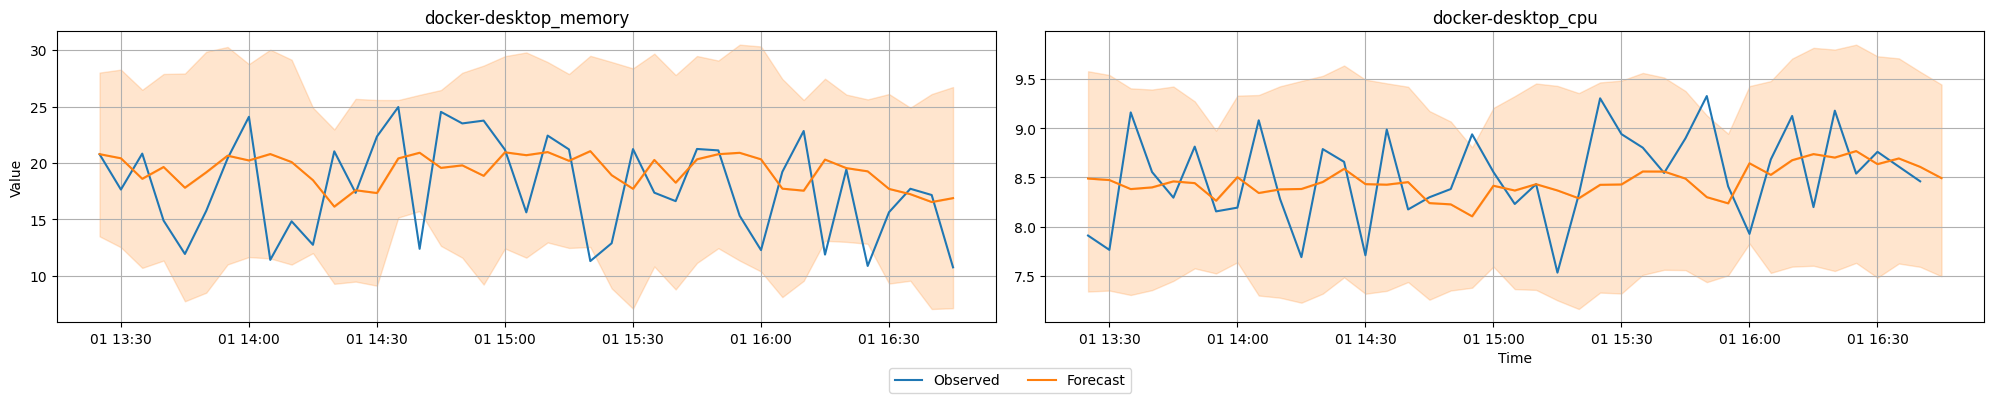

In [ ]:
predictor.plot(
    data=test_data,
    predictions=full_predictions,
    max_history_length=max_history_length,
);

In [ ]:
metrics = calculate_metrics_with_test_data_and_item(full_predictions, test_data, lower_col="0.025", upper_col="0.975")

# Print overall metrics
print("Overall Metrics:")
print(metrics["overall"])

# Print weighted metrics
print("Weighted Metrics:")
print(metrics["weighted"])

# Print variance metrics
print("Variance Metrics:")
print(metrics["variance"])

# Print per-item metrics
print("Metrics by Item:")
print(metrics["by_item"])


Overall Metrics:
{'PICP': 0.9135802469135802, 'PINAW': 0.5447120916763154, 'MSE': 11.748641826026608}
Weighted Metrics:
{'PICP': 0.9135802469135803, 'PINAW': 1.14637916826481, 'MSE': 11.74864182602661}
Variance Metrics:
{'PICP': 0.0025884889946460408, 'PINAW': 0.0029679179100999074, 'MSE': 259.21197051944563}
Metrics by Item:
                 item_id      PICP     PINAW        MSE
0     docker-desktop_cpu  0.950000  1.107381   0.223630
1  docker-desktop_memory  0.878049  1.184426  22.992555


### Compare All supported models


In [ ]:
prediction_length = 1
max_history_length = 100

leaderboard = predictor.leaderboard(silent=True)
all_models = leaderboard['model'].tolist()

all_predictions = {}
metrics_per_model = []

for model in all_models:
    print(f"Testing model: {model}")
    predictions = sliding_window_predict_with_actual_update(
        predictor, model, train_data, test_data, prediction_length, max_history_length
    )
    all_predictions[model] = predictions

    metrics = calculate_metrics_with_test_data_and_item(
        predictions, test_data, lower_col="0.025", upper_col="0.975"
    )
    print(f"{model} overall: {metrics['overall']}")
    metrics_per_model.append({
        "model": model,
        "overall": metrics["overall"],
        "weighted": metrics["weighted"],
        "variance": metrics["variance"]
    })

import pandas as pd
metrics_df = pd.DataFrame([
    {
        "model": m["model"],
        "PICP_overall": m["overall"]["PICP"],
        "PINAW_overall": m["overall"]["PINAW"],
        "MSE_overall": m["overall"]["MSE"],
        "PICP_weighted": m["weighted"]["PICP"],
        "PINAW_weighted": m["weighted"]["PINAW"],
        "MSE_weighted": m["weighted"]["MSE"],
        "PICP_variance": m["variance"]["PICP"],
        "PINAW_variance": m["variance"]["PINAW"],
        "MSE_variance": m["variance"]["MSE"]
    }
    for m in metrics_per_model
])


Testing model: WeightedEnsemble
WeightedEnsemble overall: {'PICP': 0.9135802469135802, 'PINAW': 0.5447120916763154, 'MSE': 11.748641826026608}
Testing model: DeepAR
DeepAR overall: {'PICP': 0.9135802469135802, 'PINAW': 0.5423329929891099, 'MSE': 12.000761841169354}
Testing model: DynamicOptimizedTheta
DynamicOptimizedTheta overall: {'PICP': 0.9876543209876543, 'PINAW': 0.5720717265791789, 'MSE': 10.02971336287291}
Testing model: AutoETS
AutoETS overall: {'PICP': 0.9876543209876543, 'PINAW': 0.5719396071000657, 'MSE': 9.890683096247166}


### Visualize The Results


### Model Performance Evaluation

The **MSE (Mean Squared Error)** values in the table are **relatively low**, especially when compared to the range of **our data**. This suggests that **our model** is performing well, with predictions that are generally close to the actual values on average. The low **MSE** indicates that **our model's** predictions are accurate, which is a positive sign for our forecasting task.

- **PICP (Prediction Interval Coverage Probability)** is high, which shows that the model’s prediction intervals are broad enough to contain the actual values **95%** of the time.
- However, the **wide intervals** (resulting in a high **PINAW**) reflect some **uncertainty** in the predictions rather than large errors.

Despite the wide intervals, the relatively low **MSE** and its alignment with the expected data range suggest that **our model** is still able to make accurate predictions, even though there is some uncertainty regarding the exact intervals.

### Conclusion

In conclusion:
- While **PINAW** indicates some uncertainty in the model's predictions, the **MSE** suggests that **our model's** overall error is low.
- The predictions are **quite accurate**, especially given the range of **our data**.

**Adding more data** could potentially help:
- **Reduce the interval width**.
- **Improve confidence** in the predictions.


In [ ]:
metrics_df

,model,PICP_overall,PINAW_overall,MSE_overall,PICP_weighted,PINAW_weighted,MSE_weighted,PICP_variance,PINAW_variance,MSE_variance
0,WeightedEnsemble,0.913580,0.544712,11.748642,0.913580,1.146379,11.748642,0.002588,0.002968,259.211971
1,DeepAR,0.913580,0.542333,12.000762,0.913580,1.126948,12.000762,0.002588,0.006527,270.585516
2,DynamicOptimizedTheta,0.987654,0.572072,10.029713,0.987654,1.369841,10.029713,0.000297,0.061559,187.917291
3,AutoETS,0.987654,0.571940,9.890683,0.987654,1.192172,9.890683,0.000313,0.006144,182.830555


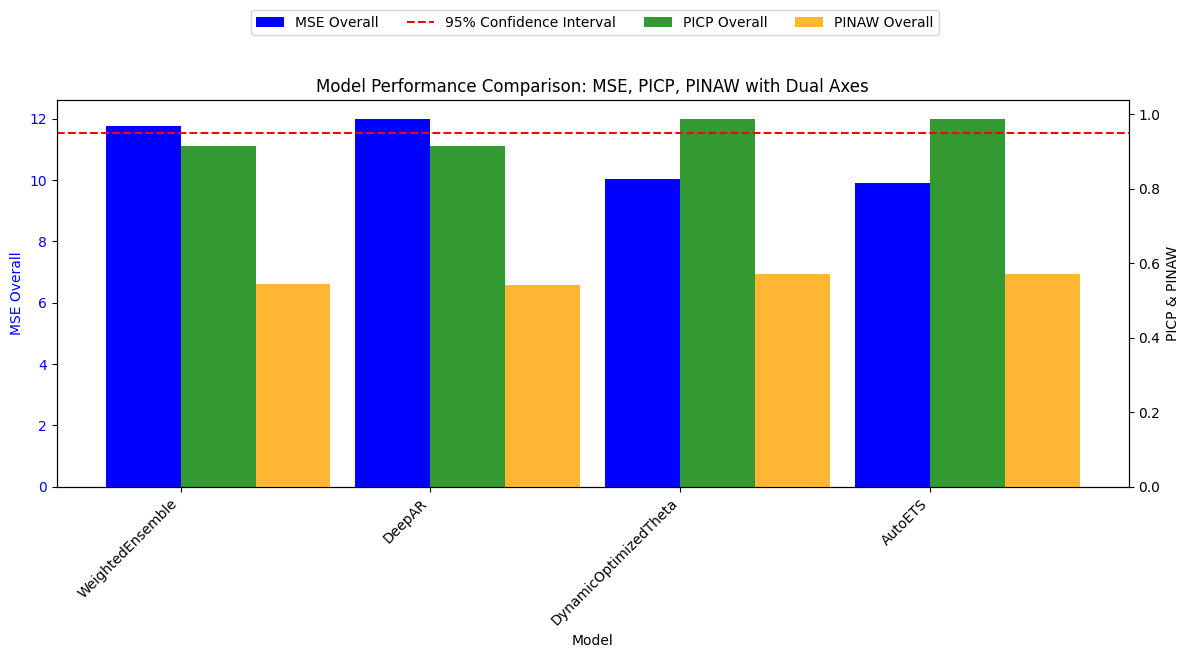

In [ ]:
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 6))

# Define the width of each bar and x positions
bar_width = 0.3
x = np.arange(len(metrics_df["model"]))  # X positions for the groups

# Plot MSE on the primary y-axis
ax1.bar(x - bar_width / 2, metrics_df["MSE_overall"], bar_width, color="blue", label="MSE Overall")
ax1.set_ylabel("MSE Overall", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("Model")
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_df["model"], rotation=45, ha="right")

# Create a secondary y-axis for PICP and PINAW
ax2 = ax1.twinx()
ax2.bar(x + bar_width / 2, metrics_df["PICP_overall"], bar_width, color="green", label="PICP Overall", alpha=0.8)
ax2.bar(x + 1.5 * bar_width, metrics_df["PINAW_overall"], bar_width, color="orange", label="PINAW Overall", alpha=0.8)
ax2.axhline(y=0.95, color="red", linestyle="--", label="95% Confidence Interval")
ax2.set_ylabel("PICP & PINAW", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Add legends
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=4)

# Set title and layout
plt.title("Model Performance Comparison: MSE, PICP, PINAW with Dual Axes")
plt.tight_layout()
plt.show()

# Save Best Model

No need to explicitly save the model, just check the directory in the content

Download respective sub directory (whole sub directory) For example, in our case, the latest one with MSELoss performs best.  

We only need the best model, but we cannot delete sub directory in colab, we need to delete all other models in the sub directory other than the best model.

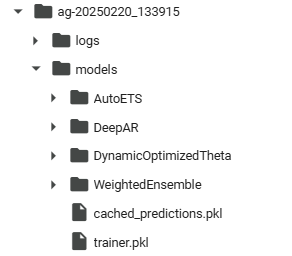